In [72]:
import numpy as np
import pandas as pd
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import xarray as xr
import datetime
import seaborn as sns
import datetime

from scipy.stats.stats import pearsonr
from palettable.colorbrewer.sequential import OrRd_6
from palettable.colorbrewer.sequential import YlGn_9
from palettable.colorbrewer.sequential import YlGnBu_8
from palettable.colorbrewer.sequential import RdPu_5
from palettable.colorbrewer.sequential import Purples_9

# my own functions
from funcs import CC_VPD
from funcs import fold

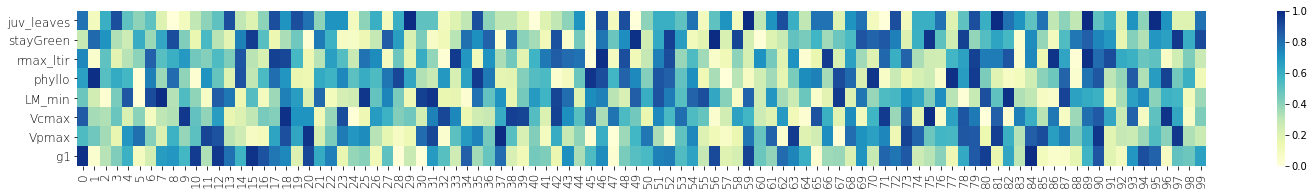

In [73]:
# setting parameter range

df_params = pd.read_csv('/home/disk/eos8/ach315/upscale/inits/param_100.csv')
df_params = df_params.drop(['rmax_ltar'], axis=1)

param_range = {'juv_leaves': [15, 25],
               'stayGreen': [3,8],
               'rmax_ltir': [0.5, 1.5],
               'phyllo': [2, 4],
               'LM_min': [80, 120],
               'Vcmax': [60, 80],
               'Vpmax': [60, 120],
               'g1': [1, 10], 
               'ref_potential': [-4, -1]}

params = df_params.columns[:-1]
df_params_fold = pd.DataFrame(columns=params)
for i in params: 
    df_params_fold[i] = fold(df_params[i], param_range[i][0], param_range[i][1])
df_params_trans = pd.DataFrame(df_params_fold.transpose())

fig, ax = plt.subplots(figsize=(28,5))
ax = sns.heatmap(df_params_trans, cmap=YlGnBu_8.mpl_colormap)

plt.xticks(fontweight='light', fontsize=12)
plt.yticks(rotation=0, fontweight='light', fontsize=12)

# adjusting color bar specifics
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
#fig.colorbar(ax, cax=cbar)

fig.subplots_adjust(left=0.2, bottom=0.45)
#plt.savefig('/home/disk/eos8/ach315/upscale/figs/params_100.png', format='png', dpi=800, transparent=True)